In [15]:
import numpy as np
import os
import h5py
import tomocam

In [16]:
sdir = '/data/tomochallange/phantom_00016/'
filename = 'phantom_00016.h5'
tomocam.cTomocam.set_num_of_gpus(4)

In [17]:
fp = h5py.File(os.path.join(sdir, filename), 'r')
data = fp['/projs']

# put data into sinogram format
s = np.array(data[:,:16,:].transpose(1,0,2))

# make sure to deep-copy
angs = np.array(fp['/angs'], copy=True)

In [18]:
# plot for sanity check

#for i in range(16):
#    plt.subplot(4, 4, i+1)
#    plt.imshow(s[i,:,:])
#plt.show()

In [19]:
# create tomocam.DistArrays
nslc, nproj, nrow = s.shape
sino = tomocam.DistArray(s.copy())
model = tomocam.DistArray(np.ones((nslc, nrow, nrow), dtype=np.float32))

In [ ]:
for itr in range(20):
    gradients = model.copy()
    tomocam.calc_gradients(gradients, sino, angs, center=640, over_sample=1.5)
    tomocam.update_total_variation(model, gradients)
    tomocam.axpy(-0.1, gradients, model)
    error = 0.1 * gradients.norm()
    print(error)

4920.006640625001
4655.01171875
4411.989453125
4189.189453125
3985.3402343750004
3799.118359375


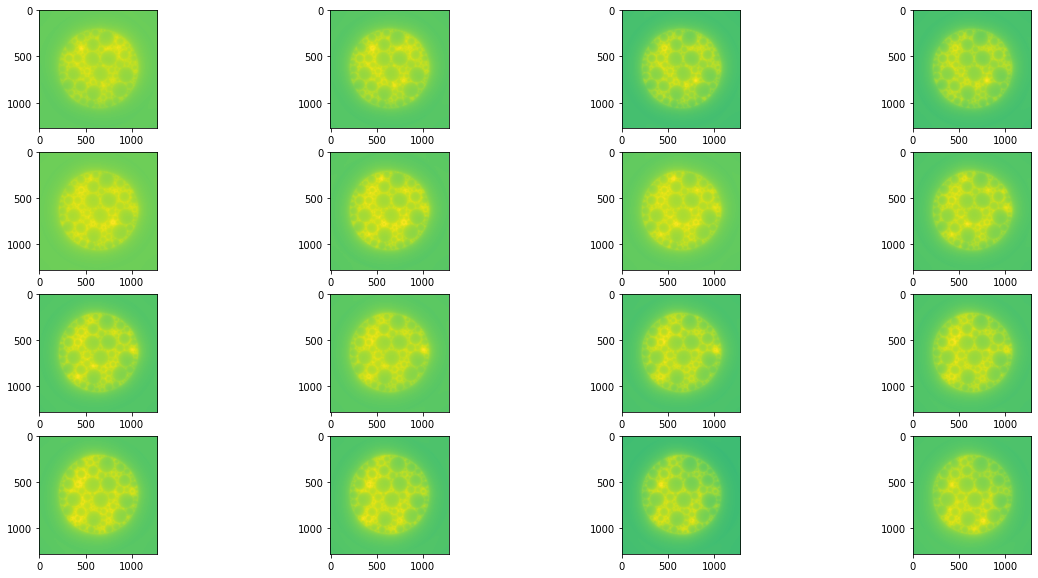

In [9]:
recon = model.to_numpy()
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(recon[i,:,:])
plt.show()